# SQL Server Ground to Cloud Security Workshop

_Last Updated: 25 July 2022_

In [this workshop](https://github.com/David-Seis/SecureYourAzureData) you'll cover the basics of securing SQL Server installations and databases, from on-premises systems to Microsoft Azure deployments.

_Note that this Notebook is an example only; and should not be used in production. It should be evaluated as a training implement only, and you should use these scripts and statements in a read-only fashion on a test system not connected to your production environment._

# Module 2 - SQL Server Security Basics

Activities from the [SQL Server Security Course](https://github.com/David-Seis/SecureYourAzureData), for [Module 2](https://github.com/David-Seis/SecureYourAzureData/blob/main/SQLSecurity/02%2520-%2520SQLServerSecurityBasics.md).

## 2.1 "Principals"

Step 1: Create a test database named "SQLSecurityTest" to hold all of the examples we will be working through today:

In [3]:
/* Module 2, Activity 1 - Create a test database */

CREATE DATABASE SQLSecurityTest;
GO

Commands completed successfully.

Total execution time: 00:00:00.722

Step 2: Open the "SamplePythonCodeNotebook" notebook and create the two windows users:

Step 3: Create a set of users in your SQL environment in a new query window, you will need to replace A1 with your device name. Remember, these are test users and are not designed to be secure.

In [8]:
/* Module 2, Activity 1 - Add Test users */

USE [master]
GO
CREATE LOGIN [A1\User1] FROM WINDOWS WITH DEFAULT_DATABASE=[SQLSecurityTest]
GO

USE [SQLSecurityTest]
GO
CREATE USER [A1\User1] FOR LOGIN [A1\User1]
GO

USE [master]
GO
CREATE LOGIN [A1\User2] FROM WINDOWS WITH DEFAULT_DATABASE=[SQLSecurityTest]
GO

USE [SQLSecurityTest]
GO
CREATE USER [A1\User2] FOR LOGIN [A1\User2]
GO

USE [master]
GO
CREATE LOGIN [User3] WITH PASSWORD=N'Tes#20. Use32!', DEFAULT_DATABASE=[SQLSecurityTest], CHECK_EXPIRATION=OFF, CHECK_POLICY=OFF
GO

USE [SQLSecurityTest]
GO
CREATE USER [User3] FOR LOGIN [User3]
GO

USE [master]
GO
CREATE LOGIN [User4] WITH PASSWORD=N'Tes#20. Use42!', DEFAULT_DATABASE=[SQLSecurityTest], CHECK_EXPIRATION=OFF, CHECK_POLICY=OFF
GO

USE [SQLSecurityTest]
GO
CREATE USER [User4] FOR LOGIN [User4]
GO


Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Total execution time: 00:00:00.020

## 2.1.1 Roles

Step 1: Create one server role and 2 database roles:

In [9]:
/*  Module 2, Activity 2 - Create a server role and database roles */

-- Create a server role that will eventually own a table in the database
USE master;
CREATE SERVER ROLE SQLSecurityTest_Table_Owner;

-- Create a database roel that will eventually have rights to execute a stored procedure in the database
USE [SQLSecurityTest];
CREATE ROLE Stored_procedure_user_role;

--Create a database role that will have permisison to query a view in the database
USE [SQLSecurityTest];
CREATE ROLE View_user_role;

: Msg 15025, Level 16, State 1, Line 5
The server principal 'SQLSecurityTest_Table_Owner' already exists.

Total execution time: 00:00:00.339

Step 2: Assign users to roles. Remember to change the computer name from 'A1' in all the relevant places if you are running this on your own device.

In [40]:
/*  Module 2, Activity 2 - Add users to roles */

--Add user 1 to the Server role
ALTER SERVER ROLE [SQLSecurityTest_Table_Owner] ADD MEMBER [A1\User1]
GO


--Add user 2 and 3 to the stored procedure user role
USE [SQLSecurityTest]
GO
ALTER ROLE [Stored_procedure_user_role] ADD MEMBER [A1\User2]
GO

USE [SQLSecurityTest]
GO
ALTER ROLE [Stored_procedure_user_role] ADD MEMBER [User3]
GO


--Add user 1 and 4 to the View user role
USE [SQLSecurityTest]
GO
ALTER ROLE [View_user_role] ADD MEMBER [A1\User1]
GO

USE [SQLSecurityTest]
GO
ALTER ROLE [View_user_role] ADD MEMBER [User4]
GO

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Total execution time: 00:00:00.008

Step 3: Run this script to identify all user created roles on the SQL instance:

_Note: You can remove 'AND is\_fixed\_role = 0  AND name NOT IN ('public')' to see all server and database roles on the instance._

In [13]:
/*  Module 2, Activity 2 - Audit user-created roles on the server */
--Server Principals
SELECT * FROM sys.server_principals
WHERE type = 'R' AND is_fixed_role = 0 AND name NOT IN ('public')

--Database Principals
SELECT * FROM sys.database_principals 
WHERE type = 'R' AND is_fixed_role = 0  AND name NOT IN ('public')



(1 row affected)

(2 rows affected)

Total execution time: 00:00:00.012

name,principal_id,sid,type,type_desc,is_disabled,create_date,modify_date,default_database_name,default_language_name,credential_id,owning_principal_id,is_fixed_role
SQLSecurityTest_Table_Owner,271,0x5879B87CFE5D8D4487A65581B381DF3C,R,SERVER_ROLE,0,2022-07-26 19:45:28.570,2022-07-26 19:45:28.570,NULL,NULL,NULL,259,0


name,principal_id,type,type_desc,default_schema_name,create_date,modify_date,owning_principal_id,sid,is_fixed_role,authentication_type,authentication_type_desc,default_language_name,default_language_lcid,allow_encrypted_value_modifications
Stored_procedure_user_role,9,R,DATABASE_ROLE,NULL,2022-08-01 20:19:28.540,2022-08-01 20:19:28.540,1,0x010500000000000904000000C9D1BF9F7B6E544CA510EB7C0D35D34B,0,0,NONE,NULL,NULL,0
View_user_role,10,R,DATABASE_ROLE,NULL,2022-08-01 20:19:28.543,2022-08-01 20:19:28.543,1,0x01050000000000090400000092DAB72C9ACDDB458AC503316A12D3CE,0,0,NONE,NULL,NULL,0


Step 4: Run this script to identify all user-created SQL users and group them by type.

_Note: You can remove the 'WHERE type..." and the following arguments to see all SQL users on the instance._

In [14]:
/*  Module 2, Activity 2 - Audit user-created logins on the server */

-- Windows Logins
SELECT * FROM sys.server_principals 
WHERE type IN ('U','G', 'E', 'X') AND name NOT LIKE '%NT%'
ORDER BY type

-- SQL Logins 
SELECT * FROM sys.server_principals 
WHERE type = 'S' AND name NOT LIKE '%#%' AND name NOT LIKE 'sa'
ORDER BY type



(3 rows affected)

(2 rows affected)

Total execution time: 00:00:00.021

name,principal_id,sid,type,type_desc,is_disabled,create_date,modify_date,default_database_name,default_language_name,credential_id,owning_principal_id,is_fixed_role
A1\Administrator,259,0x01050000000000051500000036DA95C338EC704F7A49A0B6F4010000,U,WINDOWS_LOGIN,0,2022-07-05 17:38:25.683,2022-07-05 17:38:25.697,master,us_english,NULL,NULL,0
A1\User1,294,0x01050000000000051500000036DA95C338EC704F7A49A0B609040000,U,WINDOWS_LOGIN,0,2022-08-01 20:17:19.353,2022-08-01 20:21:21.387,SQLSecurityTest,us_english,NULL,NULL,0
A1\User2,295,0x01050000000000051500000036DA95C338EC704F7A49A0B60A040000,U,WINDOWS_LOGIN,0,2022-08-01 20:17:19.360,2022-08-01 20:17:19.367,SQLSecurityTest,us_english,NULL,NULL,0


name,principal_id,sid,type,type_desc,is_disabled,create_date,modify_date,default_database_name,default_language_name,credential_id,owning_principal_id,is_fixed_role
User3,296,0x32B7B7128FFF93409E0D0D509BA7D71D,S,SQL_LOGIN,0,2022-08-01 20:17:19.363,2022-08-01 20:17:19.373,SQLSecurityTest,us_english,NULL,NULL,0
User4,297,0xA3DAB9EA25231049AC456B3B92586D65,S,SQL_LOGIN,0,2022-08-01 20:17:19.367,2022-08-01 20:17:19.377,SQLSecurityTest,us_english,NULL,NULL,0


Step 5: Open the 'SamplePythonCodeNotebook' notebook to test the connections.

## 2.2 Securables

Step 1: Add a sample table to the test Database, view the data:

In [27]:
/*  Module 2, Activity 3 - Create a sample table */

USE [SQLSecurityTest]
    GO
    CREATE TABLE Patient (
    LoginID tinyint
    ,   LastName varchar(255)
    ,   FirstName varchar(255)
    ,   Address varchar(255)
    ,   City varchar(255)
    ,   SSN nvarchar(11)
    ,   CardNumber nvarchar(19)
    );

    INSERT INTO Patient (loginid, lastname, firstname, address, city, ssn, cardnumber)
    VALUES	
      (1,'Arbiter', 'Agatha', '111 Apple Ave.', 'Atlanta', '111-11-1111', '1111-1111-1111-1111')
      , (2, 'Bob', 'Billy', '222 Bayshore Blvd.', 'Boice', '222-22-2222', '2222-2222-2222-2222')
      , (3, 'Choice', 'Charley', '333 Castaway Ct.', 'Chesterfield', '333-33-3333', '3333-3333-3333-3333')
      , (4, 'Dangerfield', 'David', '4444 Denvue Drive', 'Denver', '444-44-4444', '4444-4444-4444-4444')
      , (5, 'Engleton', 'Edbert', '5555 Esquire Rd. E', 'Easton', '555-55-5555', '5555-5555-5555-5555')

Select * FROM Patient

Commands completed successfully.

(5 rows affected)

(5 rows affected)

Total execution time: 00:00:00.024

LoginID,LastName,FirstName,Address,City,SSN,CardNumber
1,Arbiter,Agatha,111 Apple Ave.,Atlanta,111-11-1111,1111-1111-1111-1111
2,Bob,Billy,222 Bayshore Blvd.,Boice,222-22-2222,2222-2222-2222-2222
3,Choice,Charley,333 Castaway Ct.,Chesterfield,333-33-3333,3333-3333-3333-3333
4,Dangerfield,David,4444 Denvue Drive,Denver,444-44-4444,4444-4444-4444-4444
5,Engleton,Edbert,5555 Esquire Rd. E,Easton,555-55-5555,5555-5555-5555-5555


Step 2: Create a view in the table, view the data.

In [33]:
/*  Module 2, Activity 3 - Create a sample view */
CREATE VIEW Patient_Mailing_Address AS
SELECT FirstName, LastName, Address, City
FROM Patient

Commands completed successfully.

Total execution time: 00:00:00.002

In [34]:
/*  Module 2, Activity 3 - Look at the typical return of the view */
SELECT * FROM Patient_Mailing_Address

(5 rows affected)

Total execution time: 00:00:00.006

FirstName,LastName,Address,City
Agatha,Arbiter,111 Apple Ave.,Atlanta
Billy,Bob,222 Bayshore Blvd.,Boice
Charley,Choice,333 Castaway Ct.,Chesterfield
David,Dangerfield,4444 Denvue Drive,Denver
Edbert,Engleton,5555 Esquire Rd. E,Easton


Step 3: Create a stored procedure in the database:

In [37]:
/*  Module 2, Activity 3 - Create a sample stored procedure */
USE SQLSecurityTest;  
GO  
CREATE PROCEDURE uspGetCardInformation   
    @Loginid tinyint  
AS   

    SET NOCOUNT ON;  
    SELECT Loginid, cardnumber  
    FROM Patient  
    WHERE loginId= @loginId   
GO  

EXEC dbo.uspGetCardInformation @loginID = 2

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Total execution time: 00:00:00.016

Loginid,cardnumber
2,2222-2222-2222-2222


Step 4: Grant User1 full control on the table:

In [38]:
/*  Module 2, Activity 3 - Grant CONTROL on table to User1 */
USE [SQLSecurityTest]
GO
GRANT CONTROL ON [dbo].[Patient] TO [A1\User1]
GO

Commands completed successfully.

Commands completed successfully.

Total execution time: 00:00:00.129

Step 5: Grant rights to execute the stored procedure to the 'Stored\_procdure\_user\_role' role.

In [39]:
/*  Module 2, Activity 3 - Grant EXECUTE on table to Stored_procedure_user_role */
USE [SQLSecurityTest]
GO
GRANT EXECUTE ON [dbo].[uspGetCardInformation] TO [Stored_procedure_user_role]
GO

Commands completed successfully.

Commands completed successfully.

Total execution time: 00:00:00.010

Step 6: Grant rights to use the view to the 'View\_user\_role' role.

In [41]:
/*  Module 2, Activity 3 - Grant SELECT on table to View_user_role */
USE [SQLSecurityTest]
GO
GRANT SELECT ON [dbo].[Patient_Mailing_Address] TO [View_user_role]
GO

Commands completed successfully.

Commands completed successfully.

Total execution time: 00:00:00.001

Step 7: Open the 'SamplePythonCodeNotebook' notebook and execute test queries to see how the permisisons have affected the users.

Step 8: Review the results:

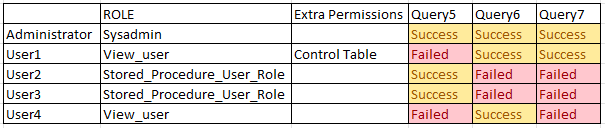  
Consider the permissions, and what was allowed based on the query and consider the presence of sensitive data.

query5 <span style="color: #000000;">=</span> <span style="color: #a31515;">"EXEC dbo.uspGetCardInformation @LoginID = 2"</span>

query6 <span style="color: #000000;">=</span> <span style="color: #a31515;">"SELECT FirstName + ' ' + Lastname + ' ' + Address + ' ' + City FROM Patient_Mailing_Address"</span>

query7 <span style="color: #000000;">=</span> <span style="color: #a31515;">"Select FirstName + ' ' + LastName +', ' + SSN FROM Patient"</span> <span style="color: #008000;">#this could be any combination of columns</span>

## 2.3 Applications

Step 1: Query the table as a general user using their login ID to see their account information:

In [42]:
/*  Module 2, Activity 4 - Select as a general user seeing account details */
SELECT * 
FROM Patient 
WHERE loginid = '1' 
-- user input = 1

(1 row affected)

Total execution time: 00:00:00.005

LoginID,LastName,FirstName,Address,City,SSN,CardNumber
1,Arbiter,Agatha,111 Apple Ave.,Atlanta,111-11-1111,1111-1111-1111-1111


Step 2: Run the query below which simulates what happens when an injection occurs:

In [43]:
/*  Module 2, Activity 4 - Select as a malicious actor using an injection string, showing all accounts in the system */
SELECT * 
FROM Patient
WHERE loginid = '' or 1=1 --'  
-- user input = ' or 1=1 --  

(5 rows affected)

Total execution time: 00:00:00.007

LoginID,LastName,FirstName,Address,City,SSN,CardNumber
1,Arbiter,Agatha,111 Apple Ave.,Atlanta,111-11-1111,1111-1111-1111-1111
2,Bob,Billy,222 Bayshore Blvd.,Boice,222-22-2222,2222-2222-2222-2222
3,Choice,Charley,333 Castaway Ct.,Chesterfield,333-33-3333,3333-3333-3333-3333
4,Dangerfield,David,4444 Denvue Drive,Denver,444-44-4444,4444-4444-4444-4444
5,Engleton,Edbert,5555 Esquire Rd. E,Easton,555-55-5555,5555-5555-5555-5555


Step 3: Run the query below showing how parameterizing the query helps prevent injection strings allowed by an application from negatively affecting SQL server:

In [53]:
/*  Module 2, Activity 4 - Select as a general user after parameterizing the query */
DECLARE @Loginid tinyint

SET @Loginid = 1
--user input = 1
SELECT * 
FROM Patient
WHERE loginid = @Loginid --parameterized input

(1 row affected)

Total execution time: 00:00:00.002

LoginID,LastName,FirstName,Address,City,SSN,CardNumber
1,Arbiter,Agatha,111 Apple Ave.,Atlanta,111-11-1111,1111-1111-1111-1111


In [48]:
/*  Module 2, Activity 4 - Select as a malicious actor after parameterizing the query */
DECLARE @Loginid tinyint

SET @Loginid = '' or 1=1-- '
--user input = ' or 1=1-- 
SELECT * 
FROM Patient
WHERE loginid = @Loginid --parameterized input

: Msg 156, Level 15, State 1, Line 3
Incorrect syntax near the keyword 'or'.

Total execution time: 00:00:00

Step 4: Notice that an error could be returned to a malicious actor which they could use to learn mroe about your environment. Adding error handling helps prevent verbose errors from giving more information for an attacker to use.

In [54]:
/*  Module 2, Activity 4 - Select as a general user after adding error handling  */
DECLARE @Loginid tinyint
BEGIN TRY
  SET @Loginid = '1' 
  --user input = 1
  SELECT * 
  FROM Patient
  WHERE loginid = @Loginid --parameterized input
END TRY
BEGIN CATCH
  Print 'Please use only your user ID'
END CATCH

(1 row affected)

Total execution time: 00:00:00.002

LoginID,LastName,FirstName,Address,City,SSN,CardNumber
1,Arbiter,Agatha,111 Apple Ave.,Atlanta,111-11-1111,1111-1111-1111-1111


In [55]:
/*  Module 2, Activity 4 - Select as a malicious actor after adding error handling  */
DECLARE @Loginid tinyint
BEGIN TRY
    SET @Loginid = ''' or 1=1--' 
    --user input = ' or 1=1--
    SELECT * 
    FROM Patient
    WHERE loginid = @Loginid --parameterized input
END TRY
BEGIN CATCH
    Print 'Please use only your user ID'
END CATCH

Please use only your user ID

Total execution time: 00:00:00

## 2.4 Encryption, Certificates, and Keys

Step 1: Create and backup master key.

In [4]:
/*  Module 2, Activity 5 - Create and backup a master key using a secure password  */
CREATE MASTER KEY ENCRYPTION BY PASSWORD = 'Fl@sh G0rd0n!';
GO

OPEN MASTER KEY DECRYPTION BY PASSWORD = 'Fl@sh G0rd0n!';
GO
BACKUP MASTER KEY TO FILE = 'C:\EncryptedDrive\masterkey.mk' 
    ENCRYPTION BY PASSWORD = 'S@vior Of.The Un1v3r$3!';
GO

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Total execution time: 00:00:00.004

Step 2: Create and backup a certificate to use with TDE:

In [13]:
/*  Module 2, Activity 5 - Create and backup the TDE_Certificate */
CREATE CERTIFICATE TDE_Cert WITH SUBJECT = 'TDE Certificate';
GO

BACKUP CERTIFICATE TDE_Cert TO FILE = 'C:\EncryptedDrive\TDE_Cert.cer'
    WITH PRIVATE KEY (
        FILE = 'C:\EncryptedDrive\TDE_Cert.pvk',
        ENCRYPTION BY PASSWORD = 'I$ @.Mirac1e!');
GO

Commands completed successfully.

Commands completed successfully.

Total execution time: 00:00:00.053

Step 3: Verify the creation/presence of the TDE\_Cert and the Database Master key.

In [30]:
/*  Module 2, Activity 5 - Verify the creation and presence of the database master key and TDE_Cert */
USE [master]
SELECT name, pvt_key_encryption_type_desc, expiry_date, Start_date, pvt_key_last_backup_date FROM sys.certificates where [name] = 'TDE_Cert'
GO

Select name, create_date from sys.symmetric_keys WHERE name like '%DatabaseMaster%'

(1 row affected)

(1 row affected)

Total execution time: 00:00:00.011

name,pvt_key_encryption_type_desc,expiry_date,Start_date,pvt_key_last_backup_date
TDE_Cert,ENCRYPTED_BY_MASTER_KEY,2023-08-02 23:50:23.000,2022-08-02 23:50:23.000,2022-08-02 23:50:23.617


name,create_date
##MS_DatabaseMasterKey##,2022-08-02 19:40:55.170


Step 4: Encrypt the test Database (the time of this process is dependent on the size of the database beign encrypted

In [17]:
/*  Module 2, Activity 5 - Encrypt the Test Database */
USE SQLSecurityTest
GO

/*Create Encryption key*/
CREATE DATABASE ENCRYPTION KEY
    WITH ALGORITHM = AES_256
    ENCRYPTION BY SERVER CERTIFICATE TDE_Cert;
GO

/* Encrypt database */
ALTER DATABASE SQLSecurityTest SET ENCRYPTION ON;
GO

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Total execution time: 00:00:00.423

In [19]:
/*  Module 2, Activity 5 - Verify Encryption */
SELECT 
DB_NAME(database_id) AS DatabaseName
, encryption_state_desc AS EncryptionState
, key_algorithm AS Algorithm
, key_length AS KeyLength
FROM sys.dm_database_encryption_keys
GO

SELECT 
NAME AS DatabaseName
, IS_ENCRYPTED AS IsEncrypted 
FROM sys.databases where name ='SQLSecurityTest'
GO

(2 rows affected)

(1 row affected)

Total execution time: 00:00:00.009

DatabaseName,EncryptionState,Algorithm,KeyLength
tempdb,ENCRYPTED,AES,256
SQLSecurityTest,ENCRYPTED,AES,256


DatabaseName,IsEncrypted
SQLSecurityTest,1


## 2.5 Auditing

Step 1: Create a SQL Server Audit for the Patient table data

In [39]:
/*  Module 2, Activity 6 - Create and enable the  Server Audit */
USE [master]
GO

CREATE SERVER AUDIT [Patient_Data_Audit]
TO FILE 
(	FILEPATH = N'C:\EncryptedDrive'
	,MAXSIZE = 1024 MB
	,MAX_ROLLOVER_FILES = 10
	,RESERVE_DISK_SPACE = OFF
) WITH (QUEUE_DELAY = 1000, ON_FAILURE = CONTINUE)

GO

ALTER SERVER AUDIT [Patient_Data_Audit]  
WITH (STATE = ON) ;  
GO  

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Total execution time: 00:00:00.008

Step 2: Add an Audit Specification that catches actions on the table

In [46]:
/*  Module 2, Activity 6 - Create the database audit specification.  */
USE [SQLSecurityTest]
CREATE DATABASE AUDIT SPECIFICATION Audit_Data_Select_On_Patient_Table
FOR SERVER AUDIT [Patient_Data_Audit]
ADD ( SELECT, INSERT, UPDATE, DELETE  
     ON SQLSecurityTest.dbo.Patient BY Public )  
WITH (STATE = ON) ;    
GO  

Commands completed successfully.

Total execution time: 00:00:00.002

Step 3: Go to the Python notebook to perform autidable actions from the app side.

In [47]:
/*  Module 2, Activity 6 - Run queries that will be caught by the audit  */
USE [SQLSecurityTest]
INSERT INTO Patient (LoginID,FirstName,LastName,Address,City,SSN,CardNumber)
VALUES ('6','Fred','Fernandez', '66 Freedom Fwy.', 'Fremont', '666-66-6666', '6666-6666-6666-6666')
GO

USE [SQLSecurityTest]
SELECT * FROM Patient
WHERE LoginID > 3
GO

USE [SQLSecurityTest]
UPDATE Patient
SET City = 'Fresno' 
WHERE City = 'Fremont'
GO

USE [SQLSecurityTest]
SELECT * FROM Patient
WHERE LoginID > 3
GO

USE [SQLSecurityTest]
DELETE FROM Patient
WHERE FirstName = 'Fred'
GO

USE [SQLSecurityTest]
SELECT * FROM Patient
GO

(1 row affected)

(3 rows affected)

(1 row affected)

(3 rows affected)

(1 row affected)

(5 rows affected)

Total execution time: 00:00:00.011

LoginID,LastName,FirstName,Address,City,SSN,CardNumber
4,Dangerfield,David,4444 Denvue Drive,Denver,444-44-4444,4444-4444-4444-4444
5,Engleton,Edbert,5555 Esquire Rd. E,Easton,555-55-5555,5555-5555-5555-5555
6,Fernandez,Fred,66 Freedom Fwy.,Fremont,666-66-6666,6666-6666-6666-6666


LoginID,LastName,FirstName,Address,City,SSN,CardNumber
4,Dangerfield,David,4444 Denvue Drive,Denver,444-44-4444,4444-4444-4444-4444
5,Engleton,Edbert,5555 Esquire Rd. E,Easton,555-55-5555,5555-5555-5555-5555
6,Fernandez,Fred,66 Freedom Fwy.,Fresno,666-66-6666,6666-6666-6666-6666


LoginID,LastName,FirstName,Address,City,SSN,CardNumber
1,Arbiter,Agatha,111 Apple Ave.,Atlanta,111-11-1111,1111-1111-1111-1111
2,Bob,Billy,222 Bayshore Blvd.,Boice,222-22-2222,2222-2222-2222-2222
3,Choice,Charley,333 Castaway Ct.,Chesterfield,333-33-3333,3333-3333-3333-3333
4,Dangerfield,David,4444 Denvue Drive,Denver,444-44-4444,4444-4444-4444-4444
5,Engleton,Edbert,5555 Esquire Rd. E,Easton,555-55-5555,5555-5555-5555-5555


Step 4: Read the audit log events.

In [49]:
/*  Module 2, Activity 6 - Read the Audit log events  */
SELECT event_time, server_instance_name, server_principal_name, database_name, object_name, [statement] FROM sys.fn_get_audit_file ('C:\EncryptedDrive\Pa*',default,default);  
GO  

(9 rows affected)

Total execution time: 00:00:00.024

event_time,server_instance_name,server_principal_name,database_name,object_name,statement
2022-08-03 00:36:39.0765612,A1,A1\Administrator,,,
2022-08-03 00:38:47.0846859,A1,A1\Administrator,SQLSecurityTest,Patient,"INSERT INTO Patient (LoginID,FirstName,LastName,Address,City,SSN,CardNumber) VALUES ('6','Fred','Fernandez', '66 Freedom Fwy.', 'Fremont', '666-66-6666', '6666-6666-6666-6666')"
2022-08-03 00:38:47.0866692,A1,A1\Administrator,SQLSecurityTest,Patient,SELECT * FROM Patient WHERE LoginID > 3
2022-08-03 00:38:47.0906696,A1,A1\Administrator,SQLSecurityTest,Patient,UPDATE Patient SET City = 'Fresno' WHERE City = 'Fremont'
2022-08-03 00:38:47.0906696,A1,A1\Administrator,SQLSecurityTest,Patient,UPDATE Patient SET City = 'Fresno' WHERE City = 'Fremont'
2022-08-03 00:38:47.0926676,A1,A1\Administrator,SQLSecurityTest,Patient,SELECT * FROM Patient WHERE LoginID > 3
2022-08-03 00:38:47.0956673,A1,A1\Administrator,SQLSecurityTest,Patient,DELETE FROM Patient WHERE FirstName = 'Fred'
2022-08-03 00:38:47.0956673,A1,A1\Administrator,SQLSecurityTest,Patient,DELETE FROM Patient WHERE FirstName = 'Fred'
2022-08-03 00:38:47.0966812,A1,A1\Administrator,SQLSecurityTest,Patient,SELECT * FROM Patient
